In [1]:
# improting required library for EDA analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data and checking

In [2]:
# reading csv file
leads = pd.read_csv('Leads.csv')
leads.shape

(9240, 37)

In [3]:
#Checking date
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Handling incorrect values

In [4]:
# Here select doesnot looks like a valid value and seems to be error.
# Hence converting this value to NaN before checking missing %
leads = leads.replace('Select',np.nan)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# check columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#check numerical data
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Handling missing values

In [8]:
# check missing value %
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
#Lets remove the columns with 40% and more missing values
leads = leads.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],axis=1)
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [10]:
# check missing value % after elimination of column
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [11]:
#Checking the values where missing % is greater than 20%
# As this is considerable huge number of mising data randomly filling it with average (mean, mode) and twerks the analysis
# Hence looking at the value we would update the values to unknown , others etc

In [12]:
leads["City"].value_counts(normalize=True, dropna=False) * 100

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [13]:
#As 39% of data is missing and 34% are in Mumbai.This is skewed and will not provide insight to analysis. Hence we will drop this column.
leads.drop(['City'], axis = 1, inplace = True)

In [14]:
leads["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [15]:
# We see good distirbution of value in other categories that is approx 67%(100-36), we will fill missing value with Unknown
leads['Specialization'] = leads['Specialization'].fillna(value='UnKnown')
#Check fill value
leads["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
UnKnown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [16]:
leads["Tags"].value_counts(normalize=True, dropna=False) * 100

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [17]:
# 36% of data is missing and others value are skewed to 2 values.
#This will not be help for our analysis hence dropping column.
leads.drop(['Tags'], axis = 1, inplace = True)

In [18]:
leads["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False) * 100

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [19]:
# here also 70% of people has selected 'Better Career Prospects' skewing the data.
# this will not provide us insight. So, dropping the column
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [20]:
leads["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [21]:
# 60% of data is Unemployed and 29% is moissing. However with reference to business context with filed might me usefull.
# Hence filling the value unknowns to missing values
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(value='UnKnown')
# Check fill
leads["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
UnKnown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [22]:
leads["Country"].value_counts(normalize=True, dropna=False) * 100

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

In [23]:
# 96% data is either india or unkonow. hence dropping the column
leads.drop(['Country'], axis = 1, inplace = True)

In [24]:
# again checking the missing values
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Search                                      0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on 

In [25]:
# other columns missing value is less 2 % hence updating it with most occuring value
leads['TotalVisits']=leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0])
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0])
leads['Last Activity']=leads['Lead Source'].fillna(leads['TotalVisits'].mode()[0])
leads['Lead Source']=leads['Lead Source'].fillna(leads['TotalVisits'].mode()[0])
# check missing %
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

# Handling unique value

In [26]:
# Count unique values in each column
leads.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses         1
I agree to pay the amount through cheque       1
Magazine                                       1
Get updates on DM Content                      1
Update me on Supply Chain Content              1
Search                                         2
A free copy of Mastering The Interview         2
Newspaper                                      2
Digital Advertisement                          2
X Education Forums                             2
Newspaper Article                              2
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
Through Recommendations                        2
Lead Origin                                    5
What is your current occupation                7
Last Notable Activity                         16
Specialization                                19
Last Activity                                 22
Lead Source         

In [27]:
leads["Receive More Updates About Our Courses"].value_counts(normalize=True, dropna=False) * 100

Receive More Updates About Our Courses
No    100.0
Name: proportion, dtype: float64

In [28]:
leads["I agree to pay the amount through cheque"].value_counts(normalize=True, dropna=False) * 100

I agree to pay the amount through cheque
No    100.0
Name: proportion, dtype: float64

In [29]:
leads["Magazine"].value_counts(normalize=True, dropna=False) * 100

Magazine
No    100.0
Name: proportion, dtype: float64

In [30]:
leads["Get updates on DM Content"].value_counts(normalize=True, dropna=False) * 100

Get updates on DM Content
No    100.0
Name: proportion, dtype: float64

In [31]:
leads["Update me on Supply Chain Content"].value_counts(normalize=True, dropna=False) * 100

Update me on Supply Chain Content
No    100.0
Name: proportion, dtype: float64

In [32]:
#Droping the above column as it has only one value and will not be required for analysis
# Columns to be dropeed
columns_to_drop = ['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine','Get updates on DM Content','Update me on Supply Chain Content']

# Droping required columns
leads.drop(columns=columns_to_drop, inplace=True)

# recheck unique values
leads.nunique().sort_values(ascending=True)

Through Recommendations                      2
Digital Advertisement                        2
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Newspaper                                    2
X Education Forums                           2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Search                                       2
Lead Origin                                  5
What is your current occupation              7
Last Notable Activity                       16
Specialization                              19
Last Activity                               22
Lead Source                                 22
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1731
Lead Number                               9240
Prospect ID                               9240
dtype: int64

# Handling Numerical Outlier

In [33]:
numerical_columns = leads.select_dtypes(include=['number']).columns
numerical_columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

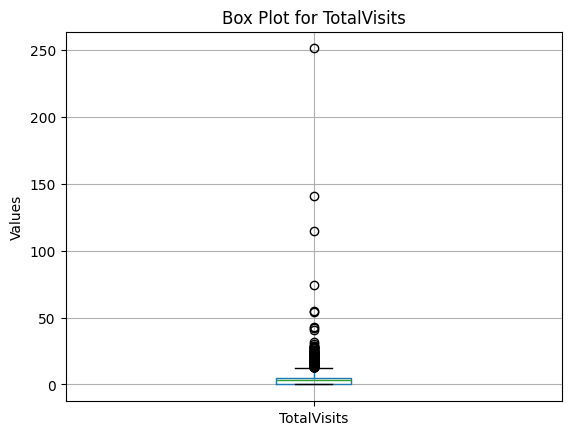

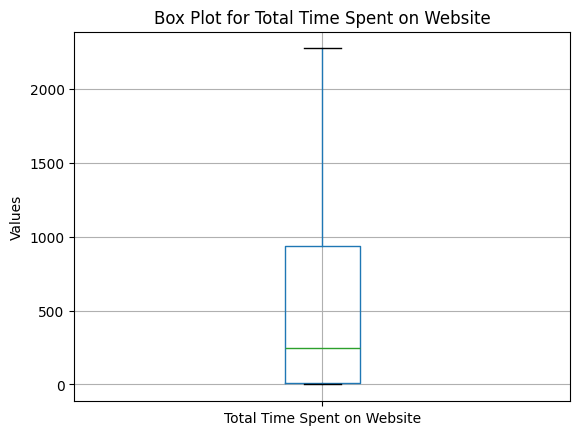

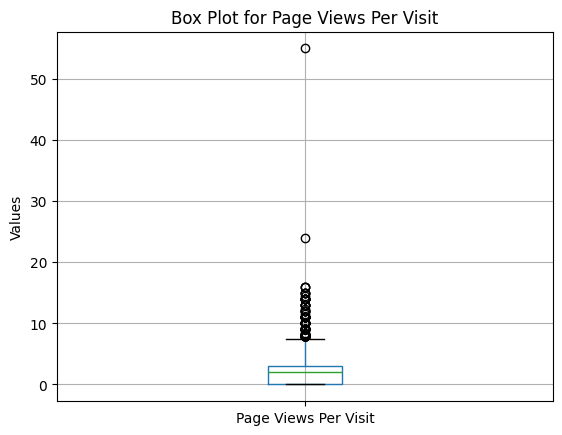

In [34]:
columns_to_plot = [ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
for column in columns_to_plot:
    plt.figure()
    leads.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

In [35]:
# 'Page Views Per visit' and 'Total Visits' has outlier
outlier_column = ['Total Time Spent on Website', 'Page Views Per Visit']
leads[outlier_column].describe(percentiles=[.10,.25,.50,.75,.95])


Total Time Spent on Website  Page Views Per Visit
count                  9240.000000           9240.000000
mean                    487.698268              2.327787
std                     548.021466              2.164258
min                       0.000000              0.000000
10%                       0.000000              0.000000
25%                      12.000000              0.000000
50%                     248.000000              2.000000
75%                     936.000000              3.000000
95%                    1562.000000              6.000000
max                    2272.000000             55.000000

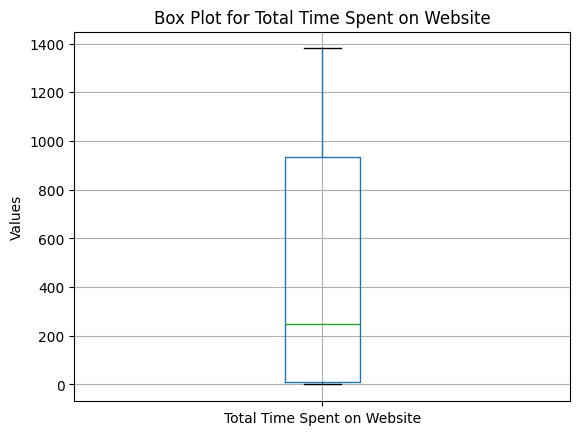

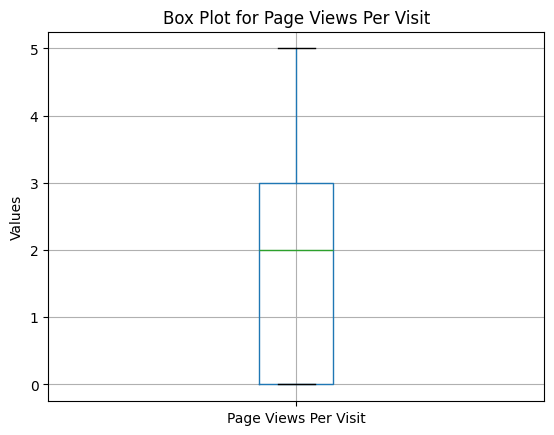

In [36]:
for column in outlier_column:
    # Calculate the 10th and 90th percentiles
    lower_bound = leads[column].quantile(0.10)
    upper_bound = leads[column].quantile(0.90)

    # Cap the outliers
    leads[column] = leads[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
#Recheck Outlier
for column in outlier_column:
    plt.figure()
    leads.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# handling ambigious data and dropping required column

In [37]:
categorical_columns = leads.select_dtypes(include=['object']).columns

# fetch unique values and its count
values_counts = {col: leads[col].value_counts() for col in categorical_columns}

# Print the unique values and their counts for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Unique values and counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Unique values and counts for column 'Lead Source':
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference      

In [38]:
# We see fields "Lead Source" and "Last Activity" with incorrect value google. Handling that.
leads['Lead Source'] = leads['Lead Source'].replace("google","Google")
leads['Last Activity'] = leads['Last Activity'].replace("google","Google")

In [39]:
# Also dropping column 'Prospect ID' as it is unique identifier
leads.drop(['Prospect ID'], axis = 1, inplace = True)

In [40]:
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                          0.0   
1          No          0          5.0                        674.0   
2          No          1          2.0                       1380.0   
3          No          0          1.0                        305.0   
4          No          1          2.0                       1380.0   

   Page Views Per Visit   Last Activity           Specialization  \
0                   0.0      Olark Chat                  UnKnown   
1                   2.5  Organic Search                  UnKnown   
2                   2.0  Direct Traffic  Business Administration   
3                   1.0  Direct Traffic    Media and Advertising   
4                   1.0          Google                  UnKnown   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

# EDA Analysis

Univariate Catergorical Analysis

In [41]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()

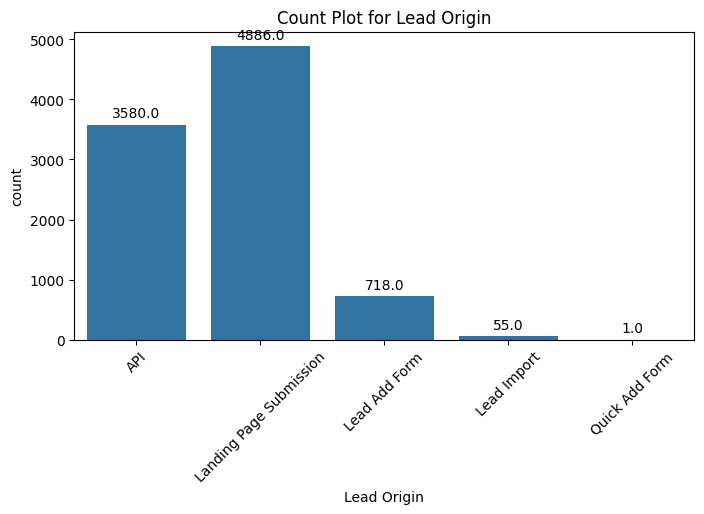

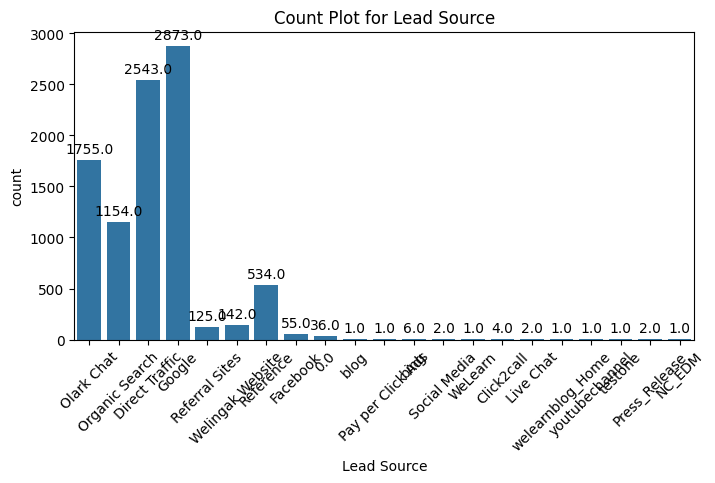

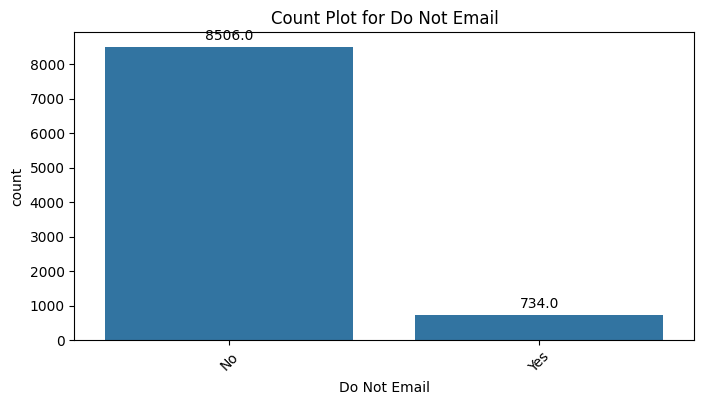

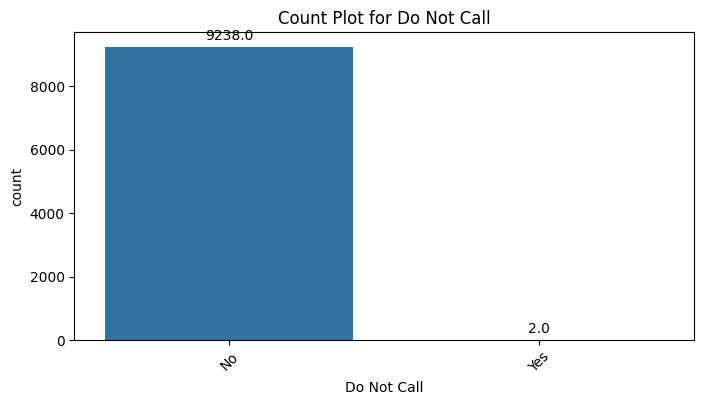

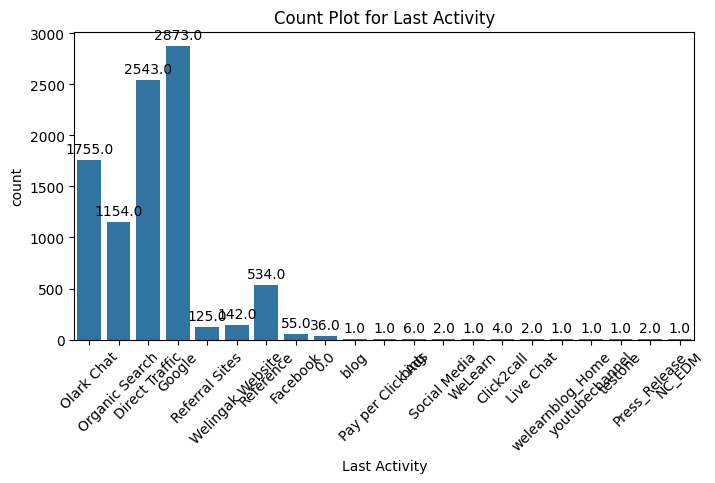

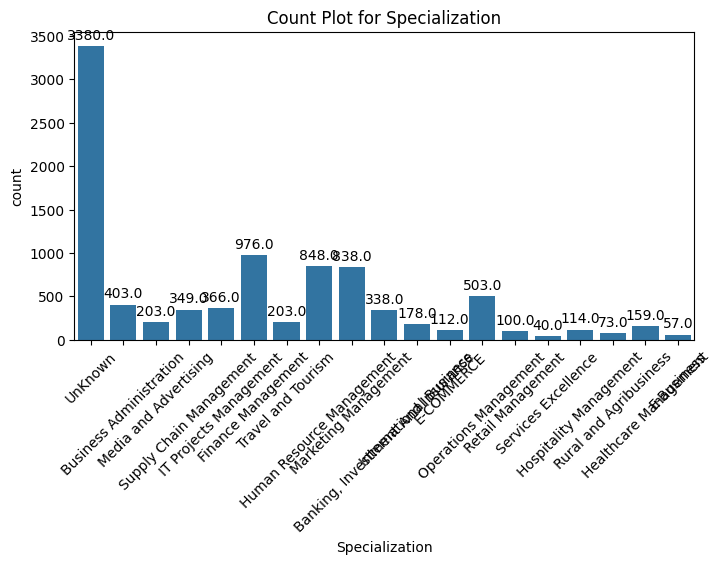

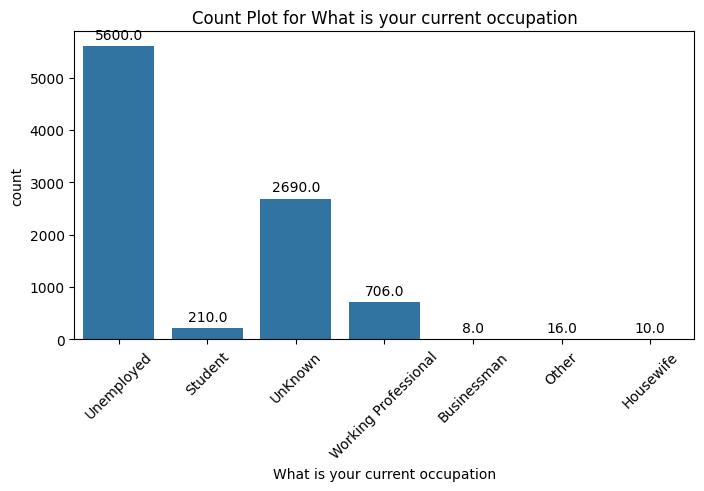

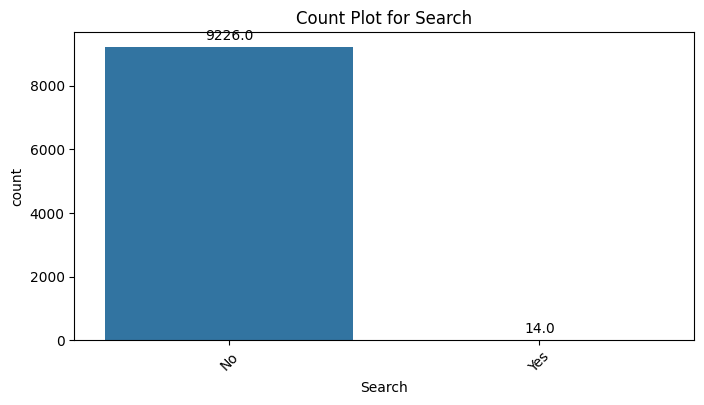

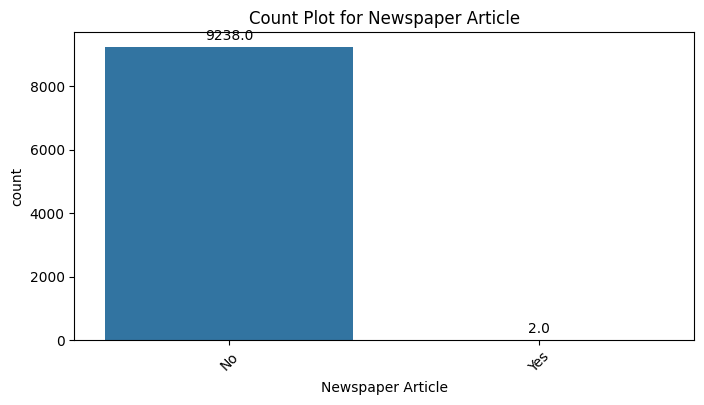

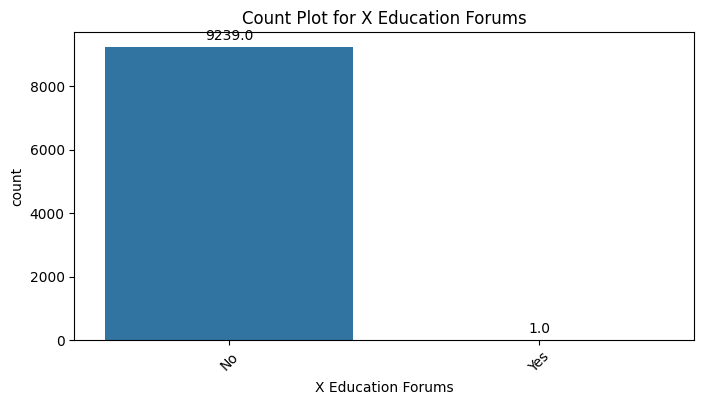

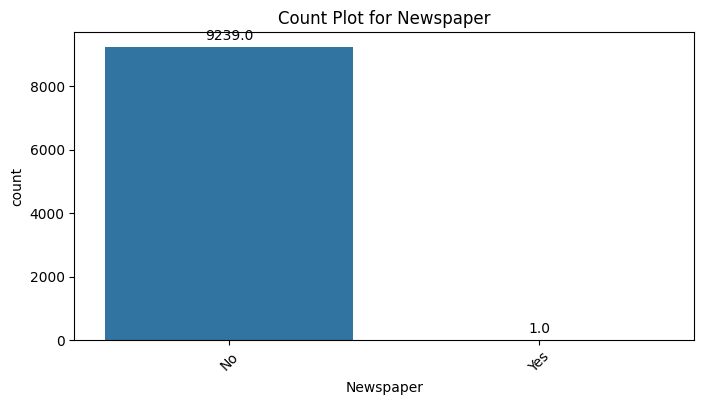

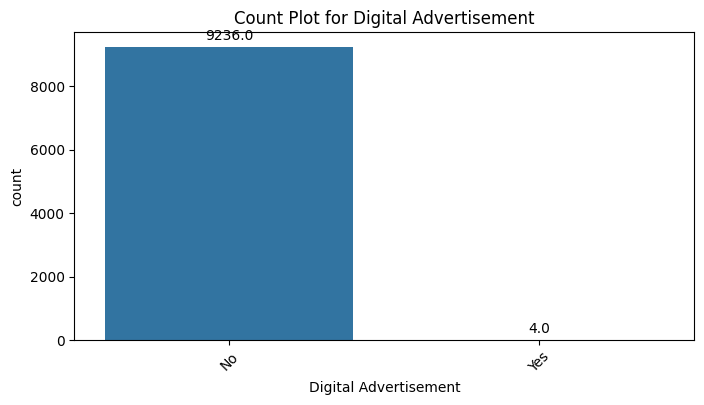

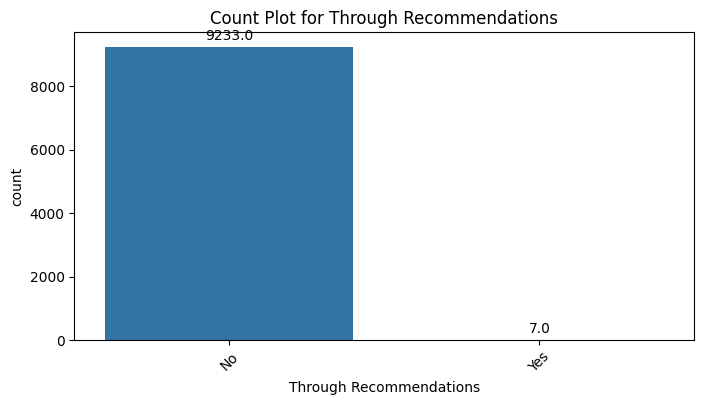

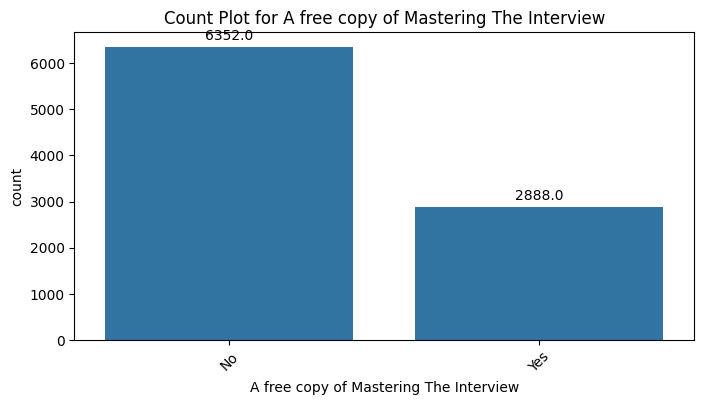

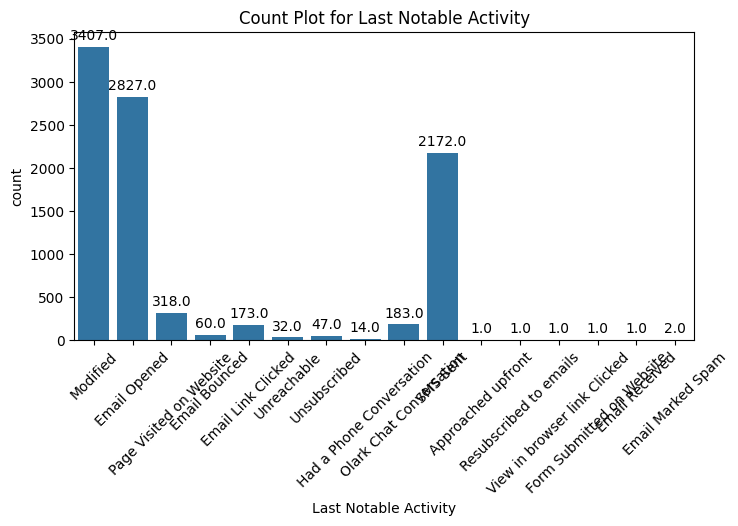

In [42]:
# Plot count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=leads)
    plt.title(f'Count Plot for {col}')
    
    # Rotate x-axis labels to be diagonal
    plt.xticks(rotation=45)
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.show()

In [43]:
# we note some categorical column are skewed. handling those by dropping column and updating value

# Fetch unique values and their counts as percentages
values_counts = {col: (leads[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Lead Source':
Lead Source
Google               31.09
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
0.0                   0.39
bing                  0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Do Not Email':
Do Not Email
No     

In [44]:
# Deleting the reqired column with skewed value less than 5%. 
#Columns: 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',Through Recommendations'
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Dropping columns
leads = leads.drop(columns=columns_to_drop)

In [45]:
# categorising the value to other with less than 1% of data
# Columns: 'Lead Source','Last Activity','Specialization','Last Notable Activity':
categorical_columns=['Lead Source','Last Activity','Specialization','Last Notable Activity']
for col in categorical_columns:
    value_counts = leads[col].value_counts(normalize=True) * 100
    values_to_update = value_counts[value_counts < 1].index
    leads[col] = leads[col].apply(lambda x: 'Others' if x in values_to_update else x)

In [46]:
# Re - Fetch unique values and their counts as percentages
values_counts = {col: (leads[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Source':
Lead Source
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Last Activity':
Last Activity
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Specialization':
Specialization
UnKnown                              36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain M

Insights:

Lead Source: The majority of traffic comes from Google (31.09%), followed by Direct Traffic (27.52%).
Last Activity: The pattern is similar.
Specialisation: Most visitors’ specialisation is unknown, with Finance Management being the highest among known specialisations.

Bivariate Catergorical Analysis

In [47]:
conversion_rate = leads['Converted'].value_counts(normalize=True) * 100
conversion_rate

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

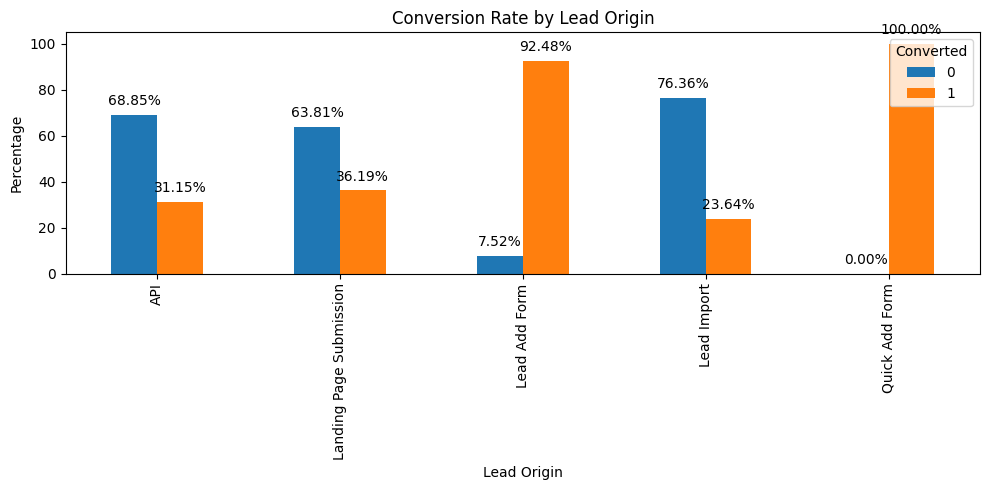

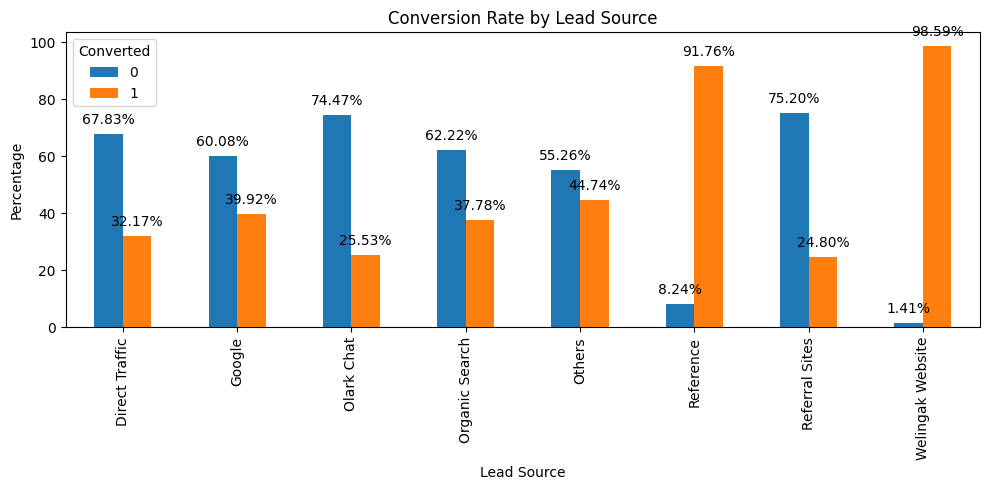

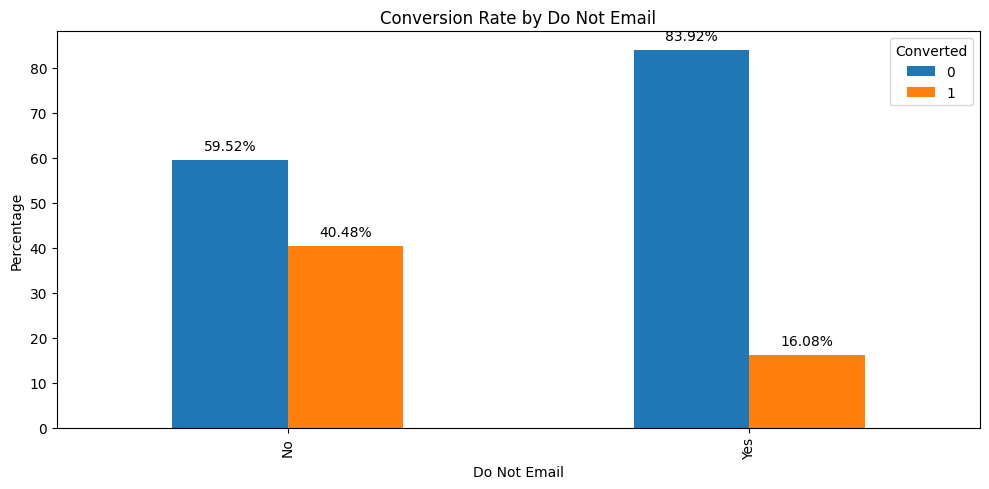

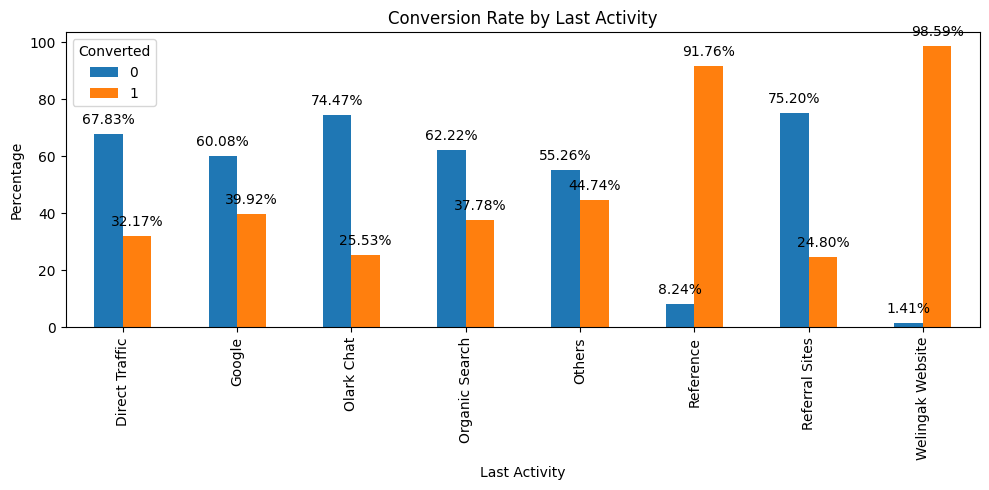

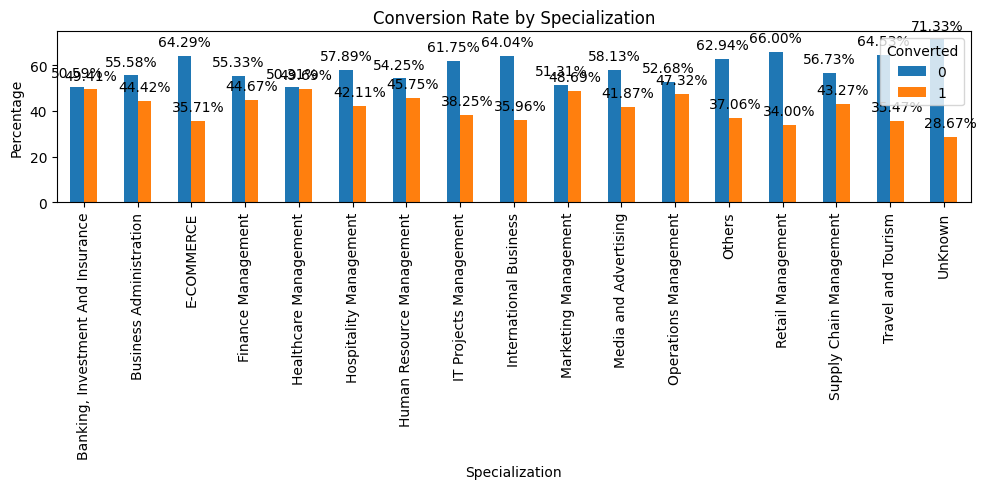

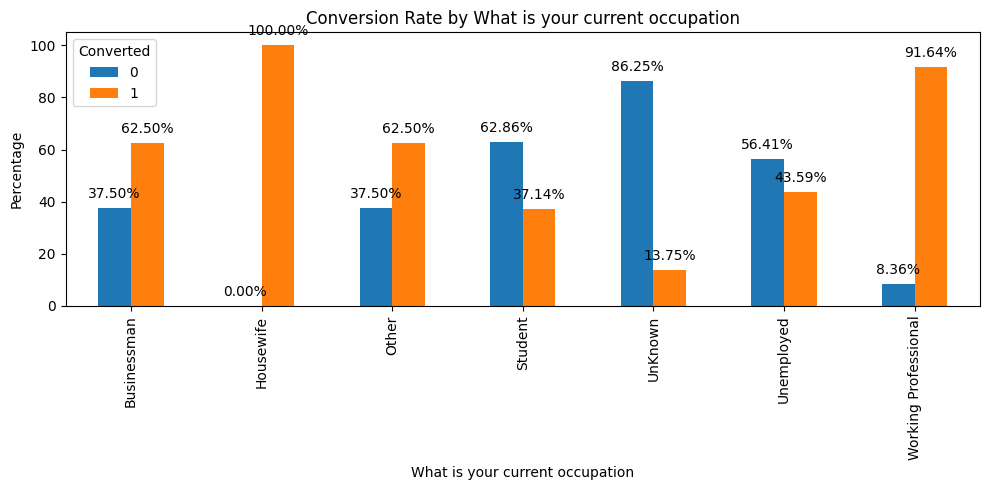

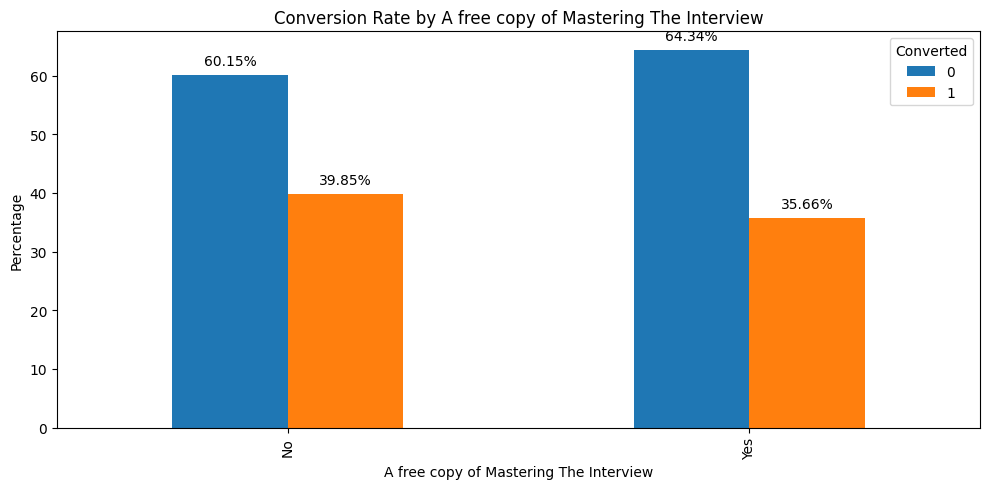

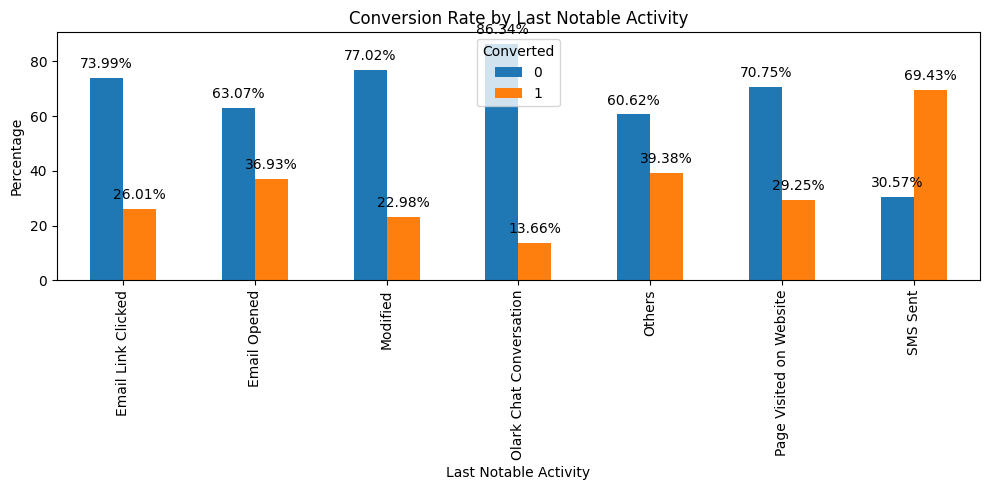

In [48]:
categorical_columns = leads.select_dtypes(include=['object']).columns

# Plot conversion rate for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Create crosstab and calculate conversion rate
    crosstab = pd.crosstab(leads[col], leads['Converted'])
    conversion_rate = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    
    # Plot the bar chart
    ax = conversion_rate.plot(kind='bar', ax=plt.gca())
    plt.title(f'Conversion Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    
    # Add data labels in percentage
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


Insights: As we are taking the % this visual show each category values are doing w.r.t to conversion.
For further analysis we will take each dataset depending on conversion: yes

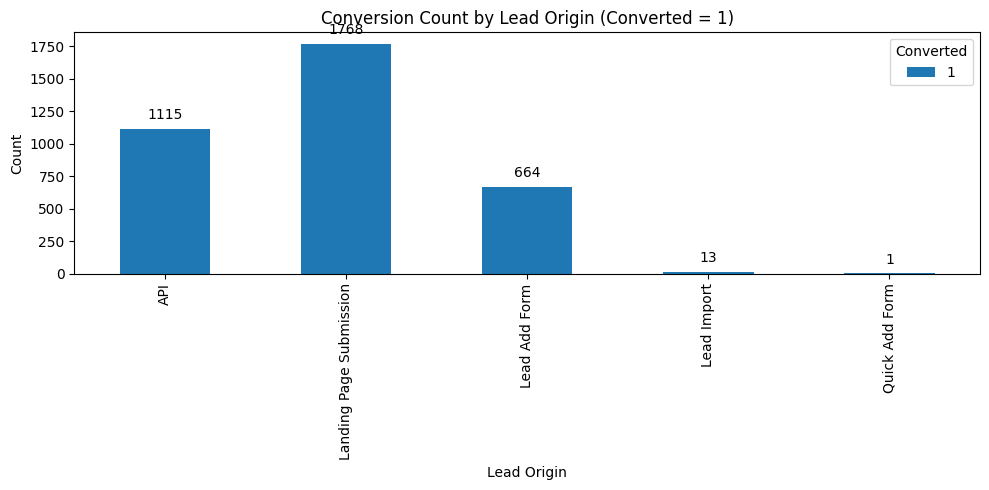

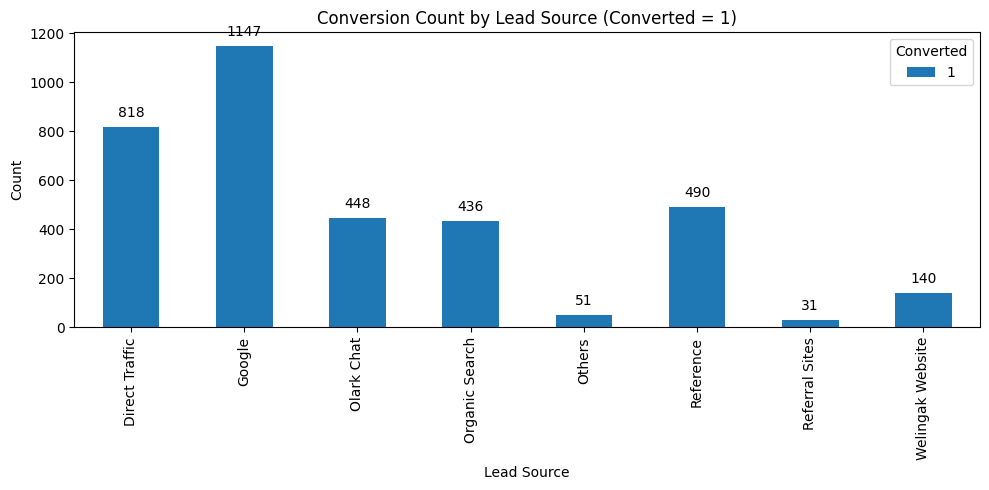

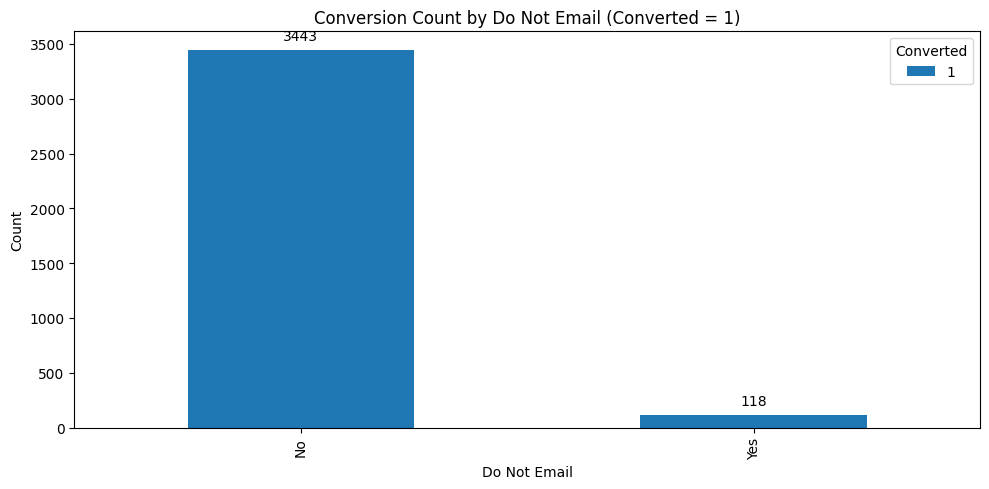

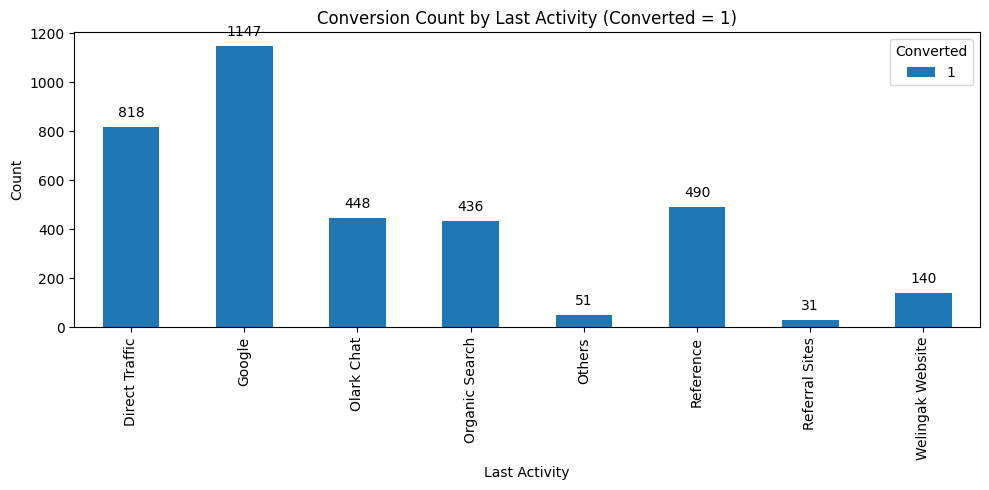

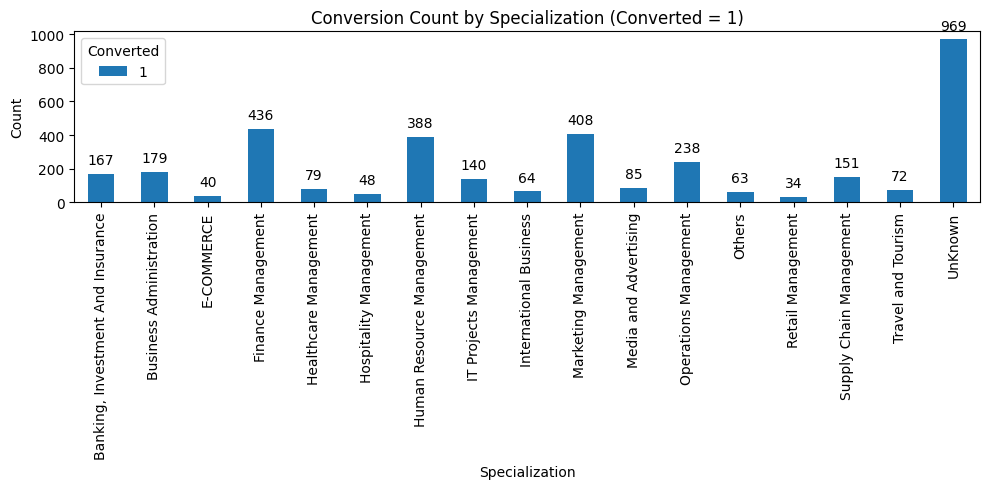

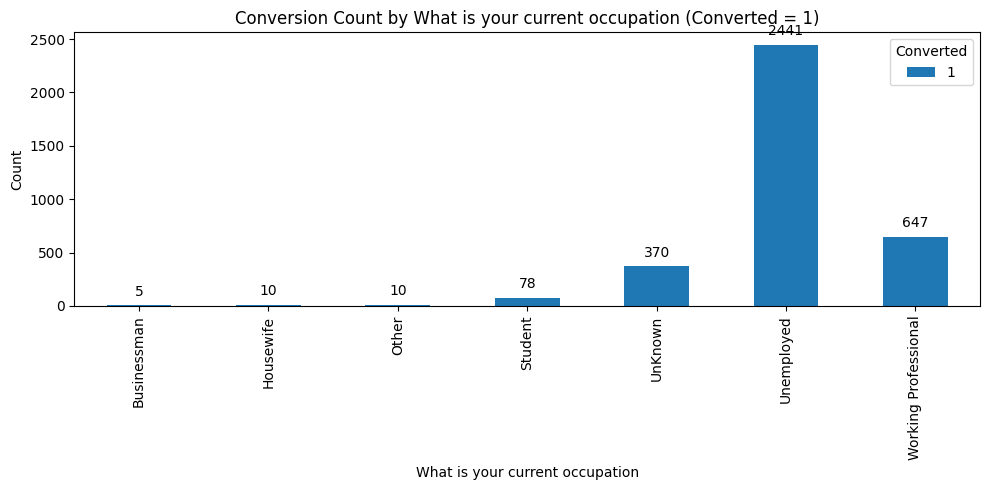

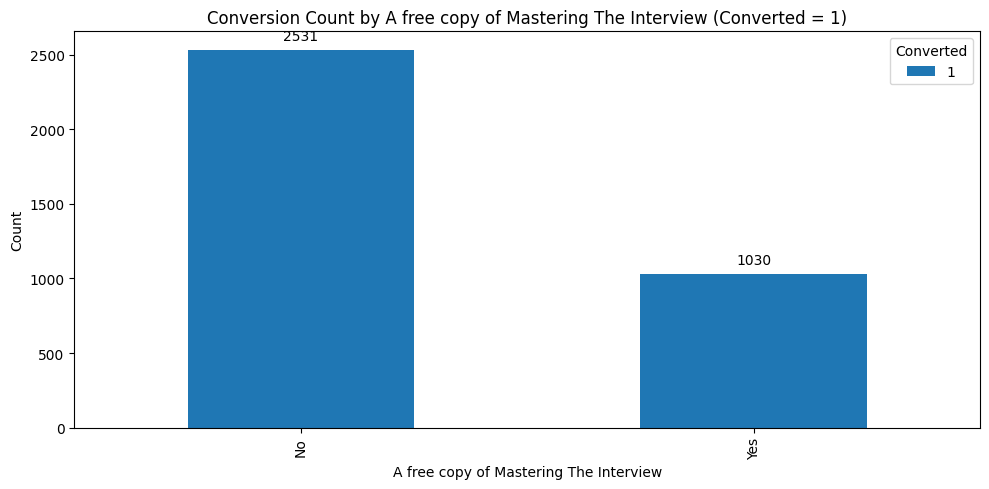

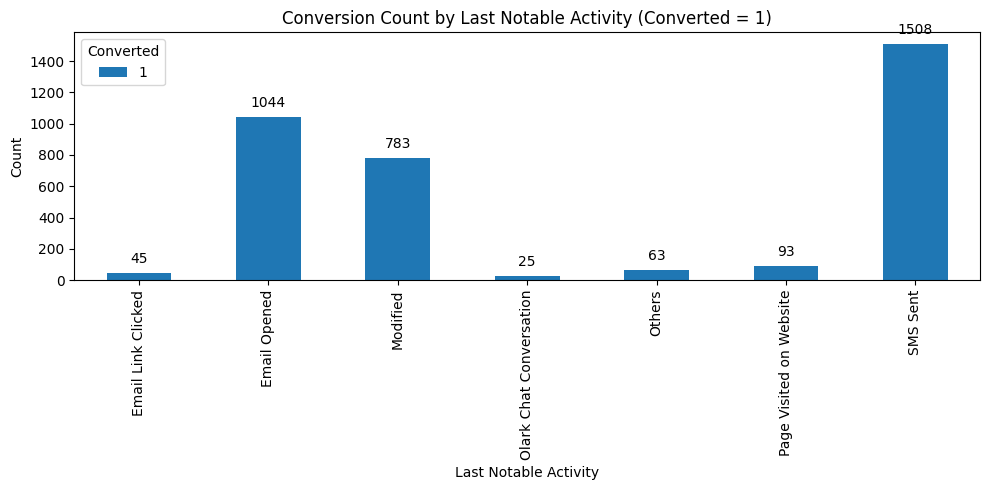

In [49]:
converted_leads = leads[leads['Converted'] == 1]

# Plot conversion count for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Create crosstab
    crosstab = pd.crosstab(converted_leads[col], converted_leads['Converted'])
    
    # Plot the bar chart
    ax = crosstab.plot(kind='bar', ax=plt.gca())
    plt.title(f'Conversion Count by {col} (Converted = 1)')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


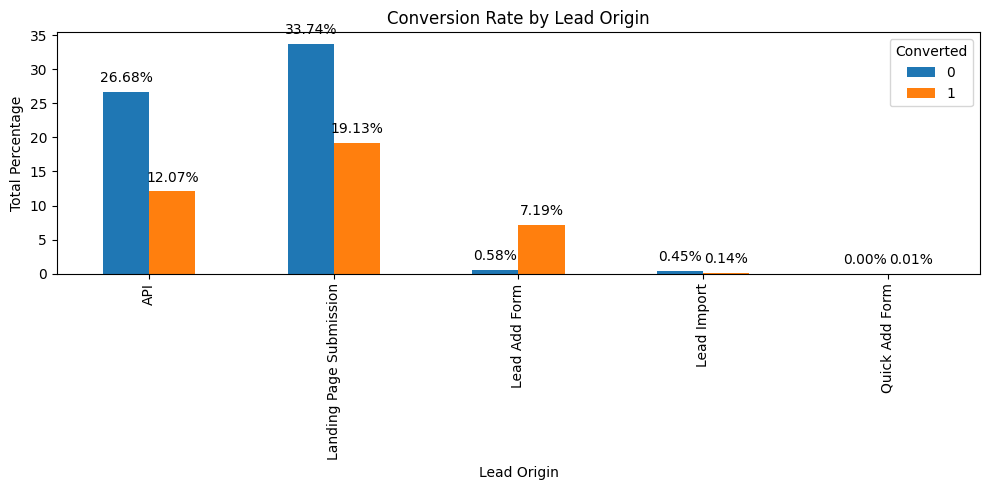

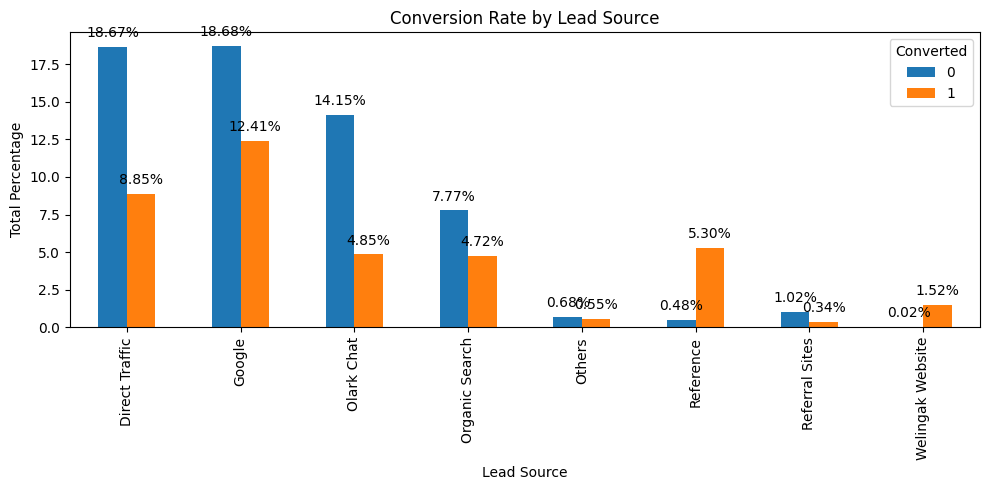

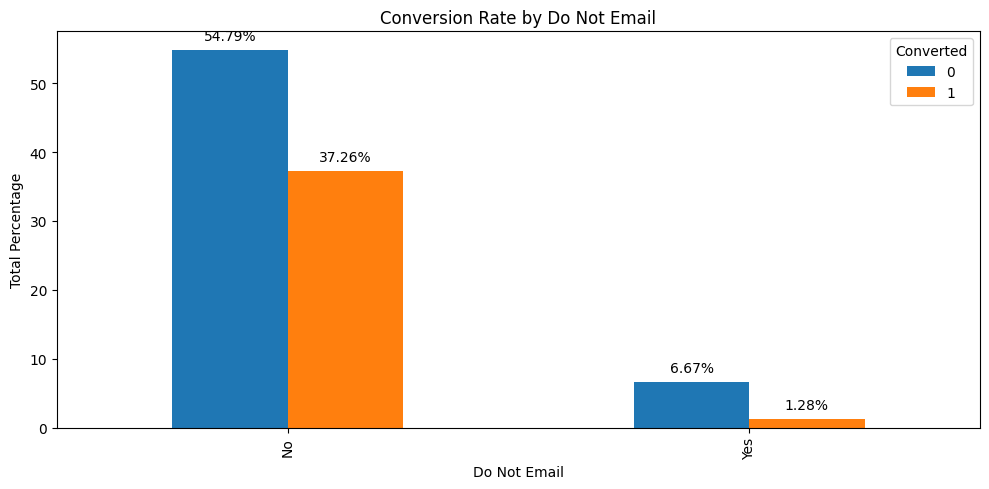

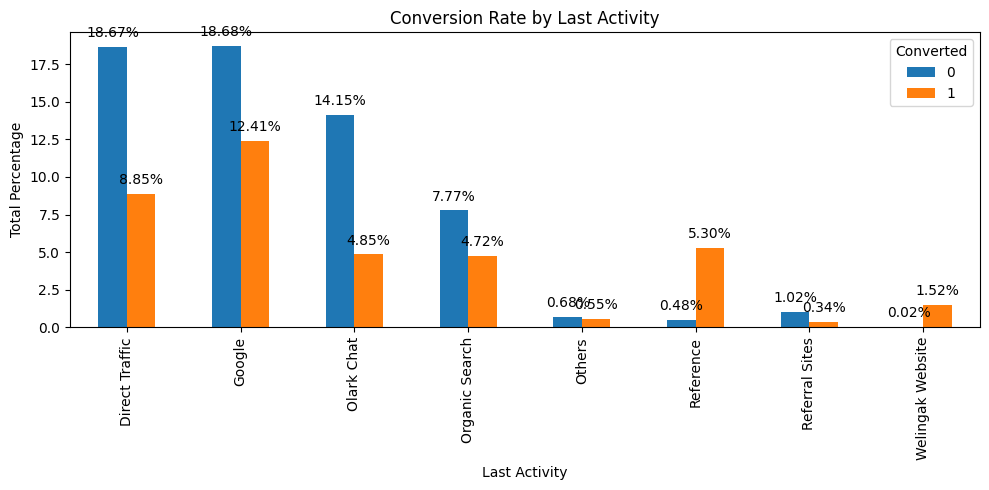

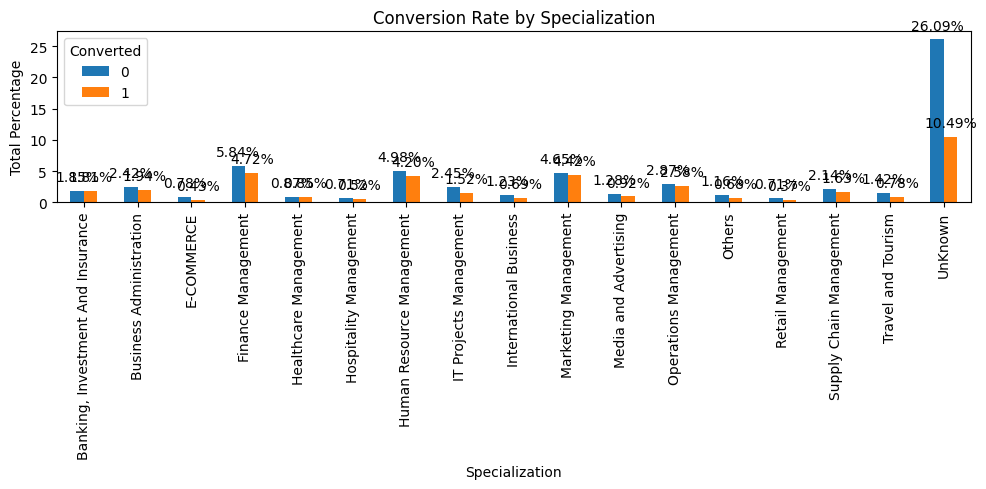

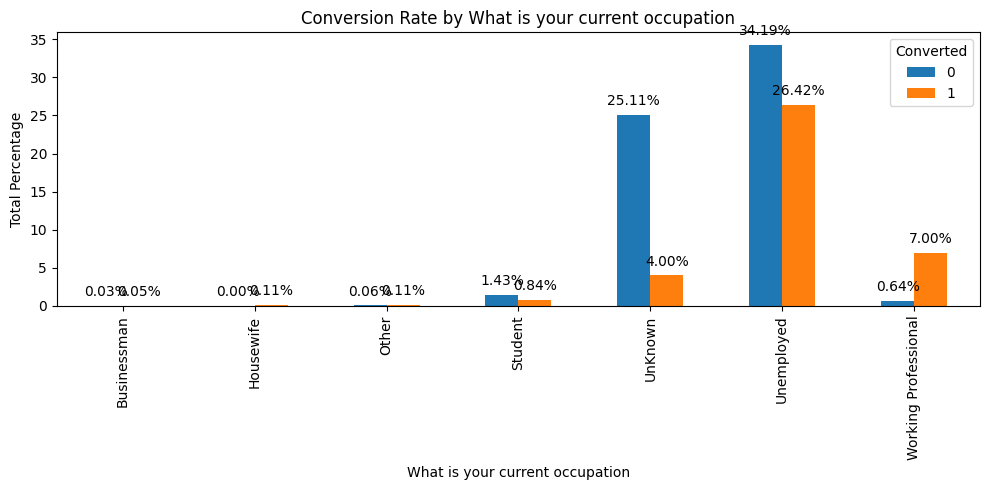

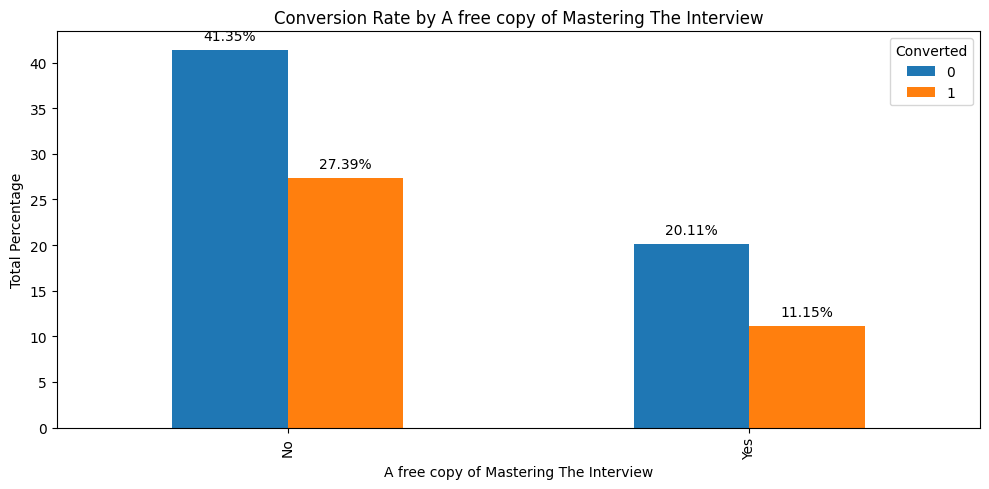

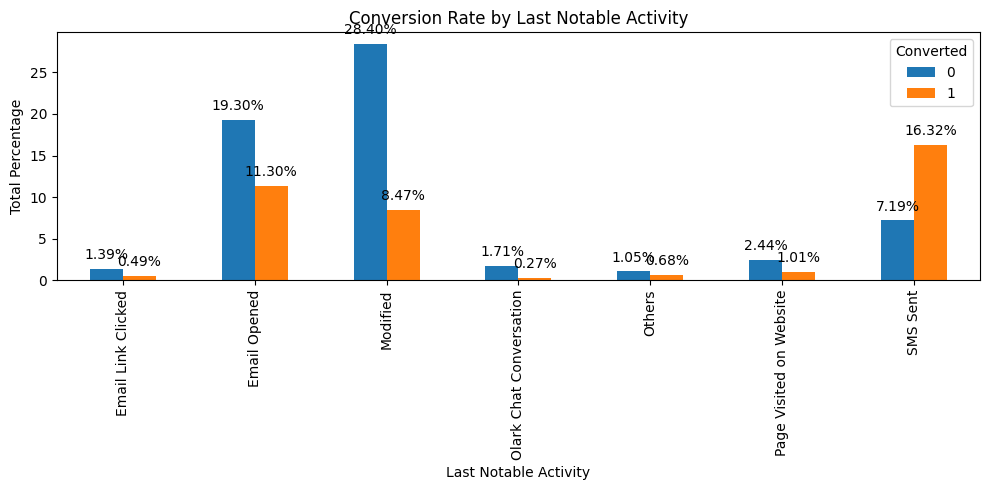

In [50]:
# Plot conversion rate for each categorical column in terms of total percentage
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Create crosstab and calculate conversion rate in terms of total percentage
    crosstab = pd.crosstab(leads[col], leads['Converted'])
    conversion_rate = crosstab.div(crosstab.sum().sum()) * 100
    
    # Plot the bar chart
    ax = conversion_rate.plot(kind='bar', ax=plt.gca())
    plt.title(f'Conversion Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Percentage')
    
    # Add data labels in total percentage
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


Insight: This visual gives details of % converted w.r.t. to total visitor instead of each category

Numerical Columns:

In [51]:
numerical_columns  =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
leads[numerical_columns].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  9240.000000           9240.000000                  9240.000000
mean      3.394156              2.158517                   465.761905
std       4.836682              1.672716                   502.991985
min       0.000000              0.000000                     0.000000
25%       0.000000              0.000000                    12.000000
50%       3.000000              2.000000                   248.000000
75%       5.000000              3.000000                   936.000000
max     251.000000              5.000000                  1380.000000

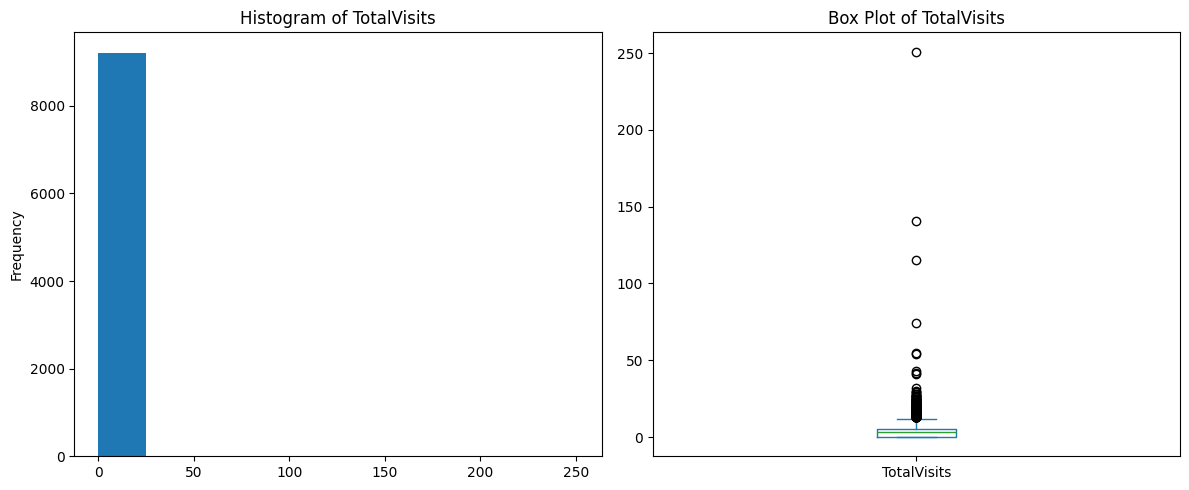

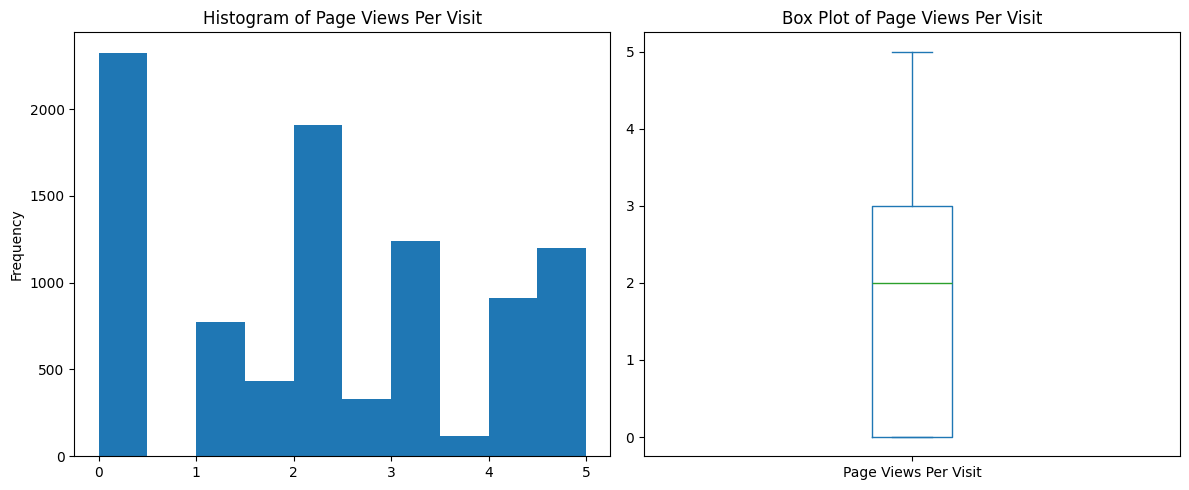

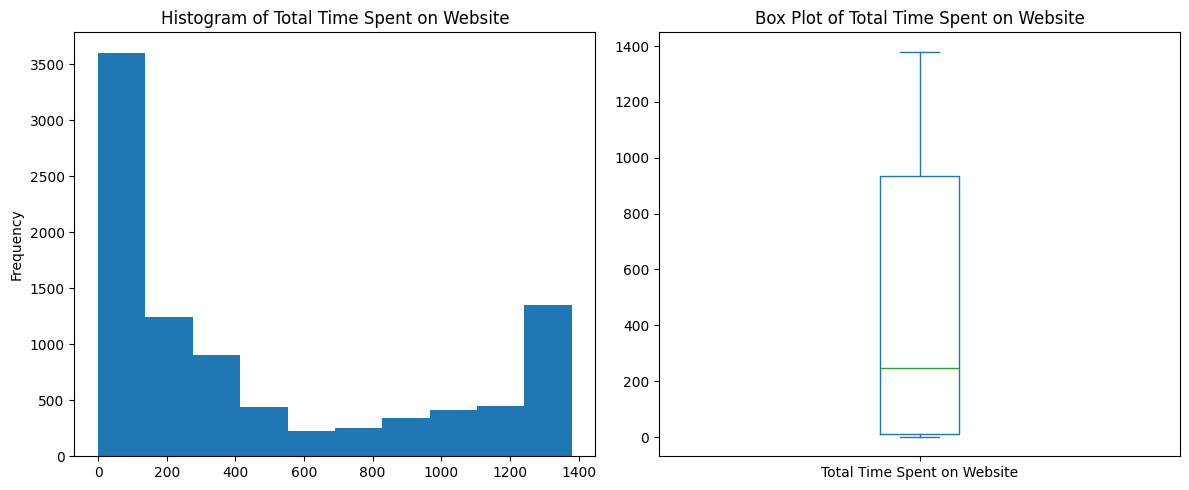

In [52]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram
    leads[col].plot(kind='hist', ax=axes[0], title=f'Histogram of {col}')
    
    # Box plot
    leads[col].plot(kind='box', ax=axes[1], title=f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

<Figure size 1400x600 with 0 Axes>

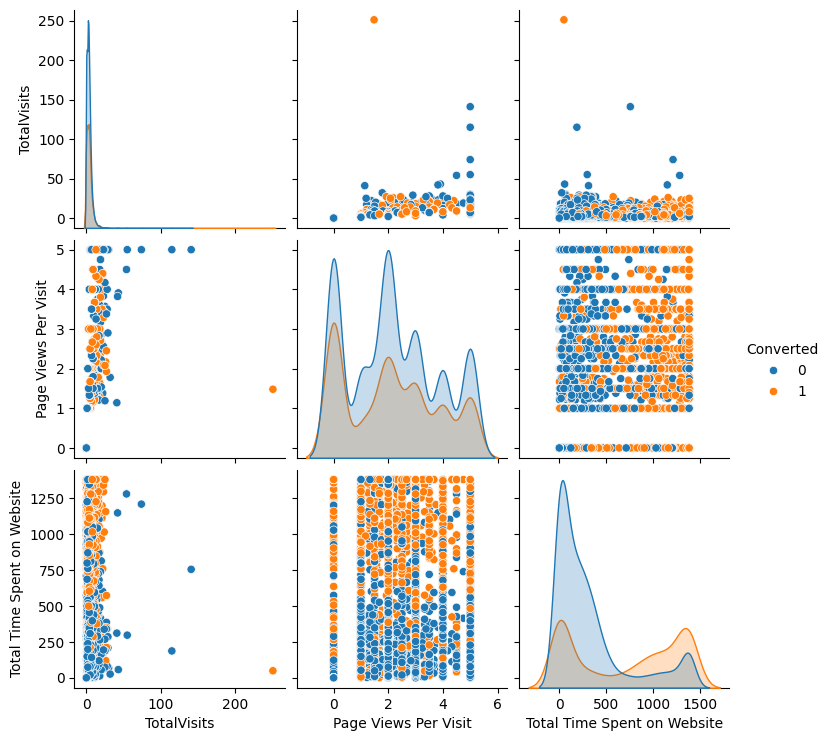

In [53]:
plt.figure(figsize=(14, 6))
sns.pairplot(data=leads,vars=numerical_columns,hue="Converted")                                  
plt.show()

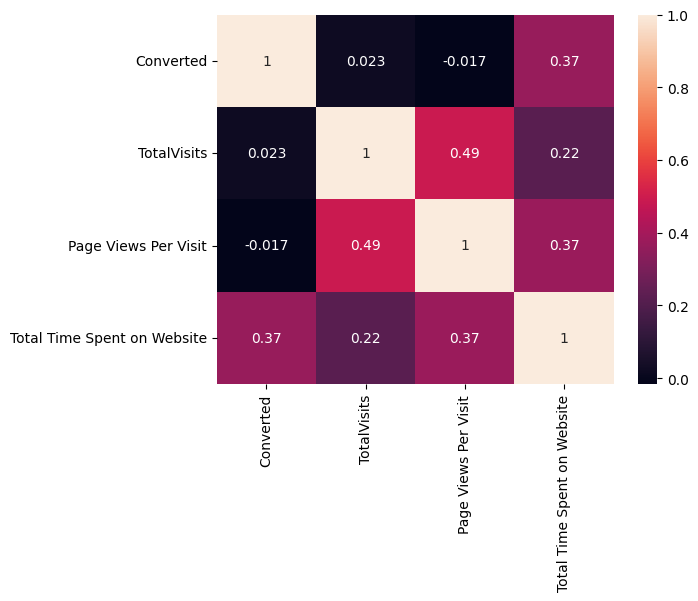

In [54]:
numerical_columns =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=leads[numerical_columns].corr(),annot=True)
plt.show()

Insight: page views per visit is highly correlated to Total Visit
More the Total Time Spent on Website highest is the rate of conversion

# Dummy Variable Creation

In [55]:
leads_df = leads

In [56]:
categorical_columns = leads_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

For categorical variables with multiple levels, create dummy features 

In [57]:
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity']], drop_first=True, dtype=int)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [58]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity'], axis= 1)

In [59]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   object 
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   object 
 7   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 8   Lead Origin_Lead Add Form                             9240

In [60]:
leads_df.head()

Lead Number Do Not Email  Converted  TotalVisits  \
0       660737           No          0          0.0   
1       660728           No          0          5.0   
2       660727           No          1          2.0   
3       660719           No          0          1.0   
4       660681           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                          0.0                   0.0   
1                        674.0                   2.5   
2                       1380.0                   2.0   
3                        305.0                   1.0   
4                       1380.0                   1.0   

  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  \
0                                     No                                    0   
1                                     No                                    0   
2                                    Yes                                    1   
3                                     No                                    1   
4                                     No                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  ...  \
0                          0                        0  ...   
1                          0                        0  ...   
2                          0                        0  ...   
3                          0                        0  ...   
4                          0                        0  ...   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_UnKnown  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0

In [61]:
# Convert specific boolean columns to integers
columns_to_convert = ['Do Not Email', 'A free copy of Mastering The Interview']
leads_df[columns_to_convert] = leads_df[columns_to_convert].applymap(lambda x: 1 if x == 'yes' else 0)

/tmp/ipykernel_62499/3646366866.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  leads_df[columns_to_convert] = leads_df[columns_to_convert].applymap(lambda x: 1 if x == 'yes' else 0)


In [62]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 8   Lead Origin_Lead Add Form                             9240

In [63]:
# dropping lead number as its an identifier
leads_df = leads_df.drop(['Lead Number'], axis= 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 7   Lead Origin_Lead Add Form                             9240 non-null   int64  
 8   Lead Origin_Lead Import                               9240

# Spliting Test -Train

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Putting feature variable to X
X = leads_df.drop('Converted', axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                          0.0   
1             0          5.0                        674.0   
2             0          2.0                       1380.0   
3             0          1.0                        305.0   
4             0          2.0                       1380.0   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       0   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   ...  What is your current occupation_Student  \
0  ...                                        0   
1  ...                                        0   
2  ...                                        1   
3  ...                                        0   
4  ...                                        0   

   What is your current occupation_UnKnown  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0

In [66]:
# Putting Target variables to y
y = leads_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()


Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.645678                    -0.920363   
6795             0     0.109111                     0.048791   
3516             0     0.297808                    -0.709417   
8105             0     0.297808                     1.527397   
3934             0    -0.645678                    -0.920363   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.289918                                       0   
6795             -0.491077                                       0   
3516              0.211663                                       0   
8105              1.713243                                       0   
3934             -1.289918                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
1871                        0                           0                   0   
6795                        0                           0                   0   
3516                        0                           0                   0   
8105                        0                           0                   1   
3934                        0                           0                   0   

      ...  What is your current occupation_Student  \
1871  ...                                        0   
6795  ...                                        0   
3516  ...                                        0   
8105  ...                                        0   
3934  ...                                        0   

      What is your current occupation_UnKnown  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      What is your current occupation_Unemployed  \
1871                                           1   
6795                                           1   
3516                                           1   
8105                                           1   
3934                                           1   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                   1                               0   
6795                                   1                               0   
3516                                   1                               0   
8105                                   0                               0   
3934                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Others  \
1871                             0   
6795                             0   
3516                             0   
8105                             0

#  Looking at Correlations

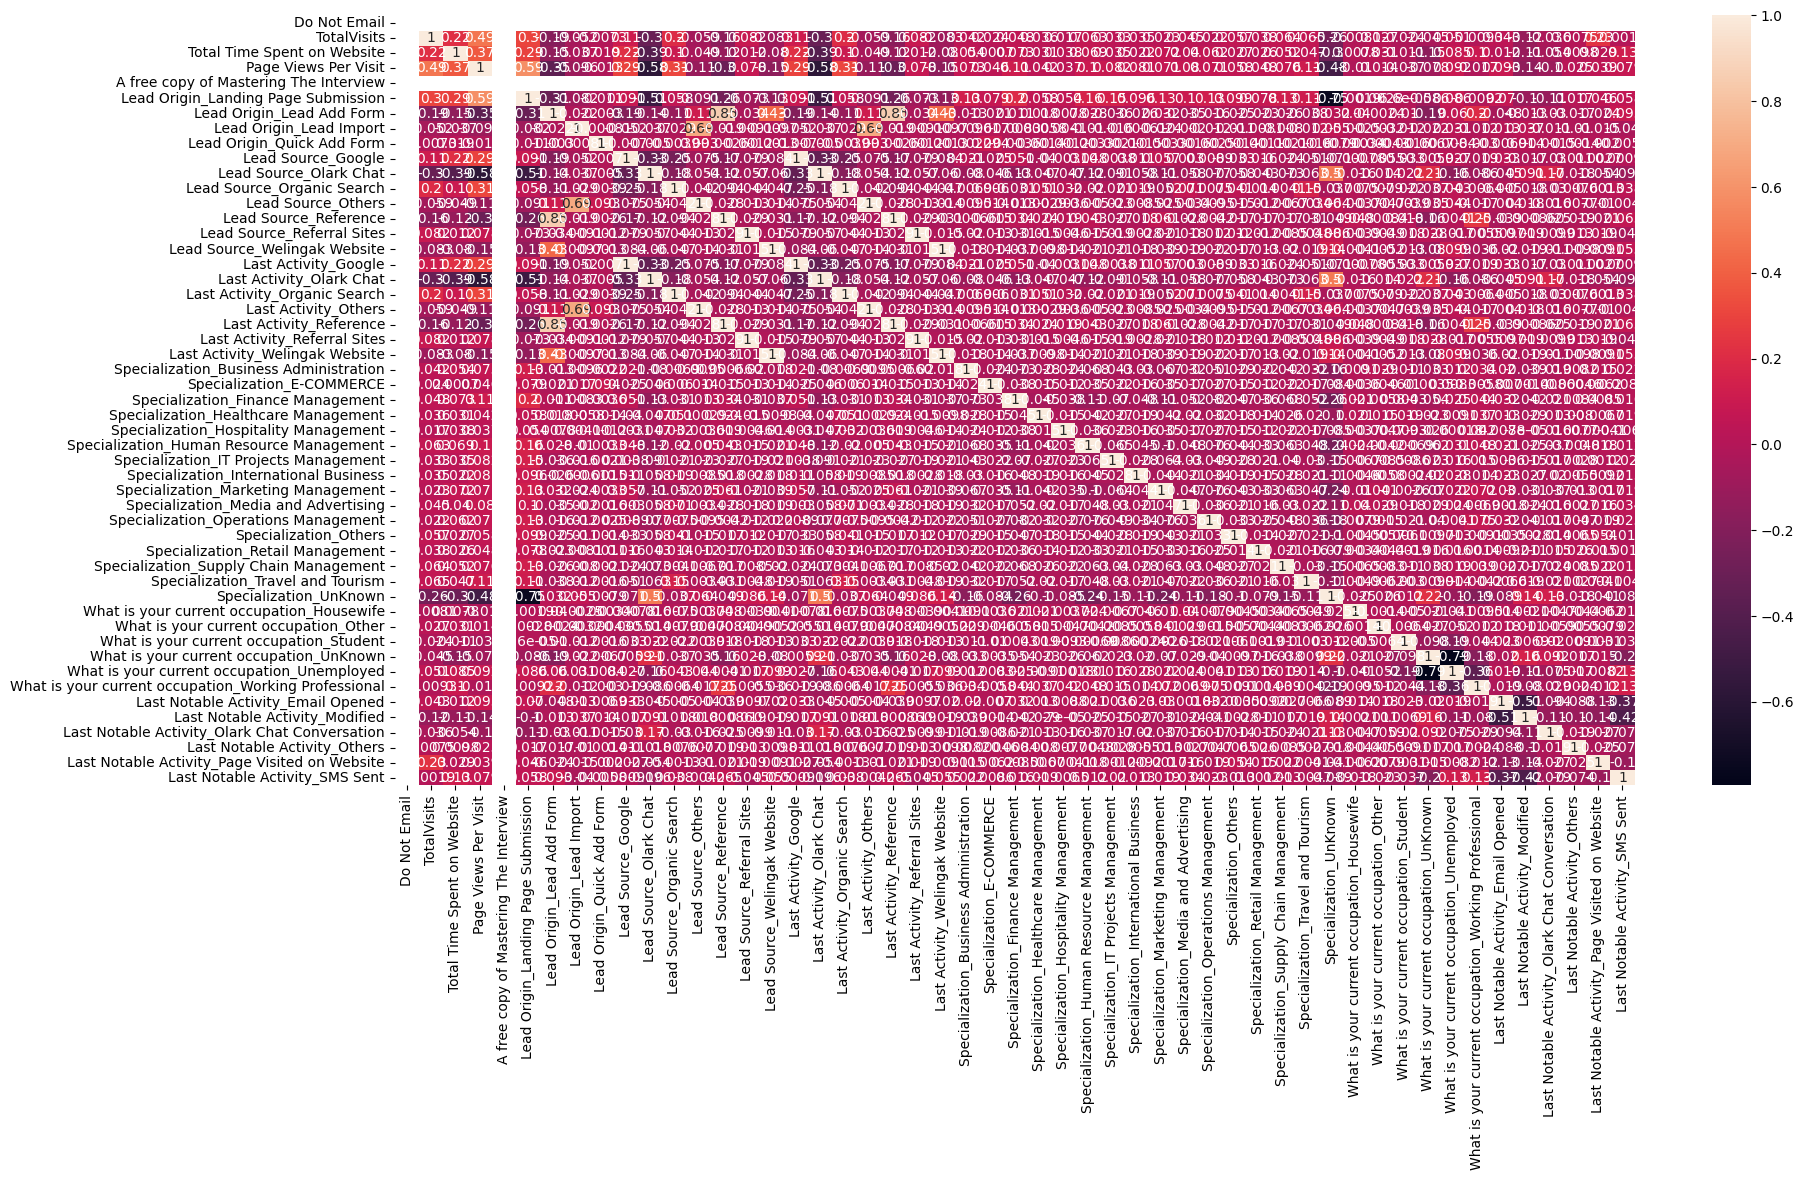

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

Due to the large number of variables, it’s challenging to decide which ones to drop. We’ll handle this after performing RFE (Recursive Feature Elimination)

#  Model Building

In [71]:
import statsmodels.api as sm

In [72]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sat, 16 Nov 2024   Deviance:                       5186.1
Time:                        12:56:38   Pearson chi2:                 6.87e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6829      1.093     -0.625      0.532      -2.825       1.459
Do Not Email                                            -0.0422      1.336     -0.032      0.975      -2.660       2.576
TotalVisits                                              0.1542      0.048      3.209      0.001       0.060       0.248
Total Time Spent on Website                              1.1305      0.041     27.857      0.000       1.051       1.210
Page Views Per Visit                                    -0.1462      0.059     -2.465      0.014      -0.262      -0.030
A free copy of Mastering The Interview                  -0.0682      2.159     -0.032      0.975      -4.300       4.164
Lead Origin_Landing Page Submission                     -0.8955      0.138     -6.475      0.000      -1.167      -0.624
Lead Origin_Lead Add Form                                1.9381      0.734      2.640      0.008       0.500       3.377
Lead Origin_Lead Import                                 -0.5518      0.804     -0.686      0.492      -2.127       1.024
Lead Origin_Quick Add Form                            2.118e+06   6.71e+07      0.032      0.975   -1.29e+08    1.34e+08
Lead Source_Google                                       0.1346      2.465      0.055      0.956      -4.698       4.967
Lead Source_Olark Chat                                   0.6612      0.184      3.591      0.000       0.300       1.022
Lead Source_Organic Search                               0.0492      1.633      0.030      0.976      -3.152       3.251
Lead Source_Others                                       0.3643      0.917      0.397      0.691      -1.432       2.161
Lead Source_Reference                                    0.7204      1.024      0.704      0.482      -1.286       2.727
Lead Source_Referral Sites                               0.0845      0.532      0.159      0.874      -0.958       1.127
Lead Source_Welingak Website                             1.9010      0.908      2.093      0.036       0.121       3.681
Last Activity_Google                                     0.2902      2.465      0.118      0.906      -4.542       5.122
Last Activity_Olark Chat                                 0.6716      0.184      3.648      0.000       0.311       1.032
Last Activity_Organic Search                             0.1523      1.633      0.093      0.926      -3.049       3.354
Last Activity_Others                                     0.4189      0.917      0.457      0.648      -1.378       2.215
Last Activity_Reference                                  0.7805      1.024      0.762      0.446      -1.226       2.787
Last Activity_Referral Sites                             0

# Feature Selection Using RFE

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False, False,  True])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 37),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Google', False, 17),
 ('Last Activity_Olark Chat', True, 1),
 ('Last Activity_Organic Search', False, 28),
 ('Last Activity_Others', False, 14),
 ('Last Activity_Reference', False, 5),
 ('Last Activity_Referral Sites', False, 29),
 ('Last Activity_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 16

In [77]:
col = X_train.columns[rfe.support_]

In [78]:
X_train = X_train[col]

Assessing the model with StatsModels

Model 1

In [79]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.6
Date:                Sat, 16 Nov 2024   Deviance:                       5243.1
Time:                        12:56:40   Pearson chi2:                 6.96e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 "What is your current occupation_Housewife" has high p-value  is insignificant in presence of other variables. can be dropped

Model 2

In [80]:
X_train = X_train.drop(['What is your current occupation_Housewife'], axis=1)

In [81]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.4
Date:                Sat, 16 Nov 2024   Deviance:                       5256.8
Time:                        12:56:40   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 "Lead Source_Reference" has high p-value  is insignificant in presence of other variables. can be dropped

Model 3

In [82]:
X_train = X_train.drop(['Lead Source_Reference'], axis=1) 

In [83]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Sat, 16 Nov 2024   Deviance:                       5258.7
Time:                        12:56:40   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

p-values for all variables is less than 0.05

VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
def get_vif(model_df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = model_df.columns
    vif_data['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].round(2)
    return vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

In [86]:
get_vif(X_train)

/opt/conda/envs/python-3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features   VIF
0                        Lead Source_Welingak Website   inf
1                      Last Activity_Welingak Website   inf
2                              Specialization_UnKnown  2.40
3                            Last Activity_Olark Chat  1.96
4                 Lead Origin_Landing Page Submission  1.91
5                      Last Notable Activity_Modified  1.91
6             What is your current occupation_UnKnown  1.64
7                      Last Notable Activity_SMS Sent  1.62
8                           Lead Origin_Lead Add Form  1.51
9                         Total Time Spent on Website  1.26
10  What is your current occupation_Working Profes...  1.20
11      Last Notable Activity_Olark Chat Conversation  1.09
12              Specialization_Hospitality Management  1.02

Removing high VIF for Lead Source_Welingak Website

Model 4

In [87]:
X_train = X_train.drop(['Lead Source_Welingak Website'], axis=1)

In [88]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Sat, 16 Nov 2024   Deviance:                       5258.7
Time:                        12:56:41   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

p-values for all variables is less than 0.05

In [89]:
get_vif(X_train)

Features   VIF
0                              Specialization_UnKnown  2.40
1                            Last Activity_Olark Chat  1.96
2                 Lead Origin_Landing Page Submission  1.91
3                      Last Notable Activity_Modified  1.91
4             What is your current occupation_UnKnown  1.64
5                      Last Notable Activity_SMS Sent  1.62
6                           Lead Origin_Lead Add Form  1.51
7                      Last Activity_Welingak Website  1.27
8                         Total Time Spent on Website  1.26
9   What is your current occupation_Working Profes...  1.20
10      Last Notable Activity_Olark Chat Conversation  1.09
11              Specialization_Hospitality Management  1.02

All the VIF values are good 

# Prediction

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.494952
6795    0.110536
3516    0.311932
8105    0.863395
3934    0.150100
4844    0.989897
3297    0.121745
8071    0.988611
987     0.121763
7423    0.903310
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49495214, 0.11053608, 0.31193181, 0.86339506, 0.15010023,
       0.98989668, 0.1217451 , 0.98861111, 0.12176317, 0.90330983])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          0        0.494952
1          0        0.110536
2          0        0.311932
3          0        0.863395
4          0        0.150100

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  predicted
0          0        0.494952          0
1          0        0.110536          0
2          0        0.311932          0
3          0        0.863395          1
4          0        0.150100          0

# Model Evalution

In [94]:
from sklearn import metrics

In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3560  442]
 [ 733 1733]]


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8183364254792826


The accuracy is above 80% which implies a good model selection

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.702757502027575

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.8895552223888056

In [100]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11044477761119441


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.7967816091954023


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8292569298858607


# Plotting the ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

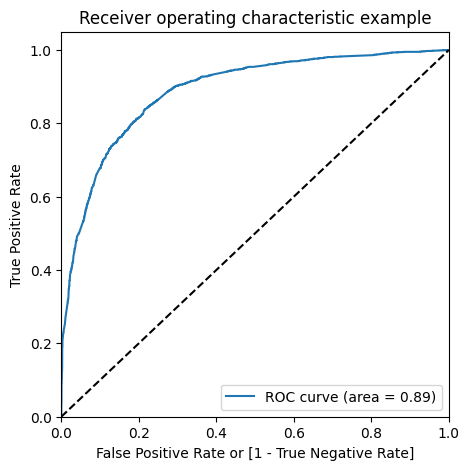

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC curve’s area is 0.89, indicating a strong model performance. 

# Finding Optimal Cutoff Point

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.494952          0    1    1    1    1    1    0    0   
1          0        0.110536          0    1    1    0    0    0    0    0   
2          0        0.311932          0    1    1    1    1    0    0    0   
3          0        0.863395          1    1    1    1    1    1    1    1   
4          0        0.150100          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.620748  0.968775  0.406297
0.2   0.2  0.766079  0.910381  0.677161
0.3   0.3  0.799938  0.850365  0.768866
0.4   0.4  0.813544  0.776561  0.836332
0.5   0.5  0.818336  0.702758  0.889555
0.6   0.6  0.802257  0.601784  0.925787
0.7   0.7  0.788961  0.542985  0.940530
0.8   0.8  0.760359  0.418086  0.971264
0.9   0.9  0.714286  0.267640  0.989505


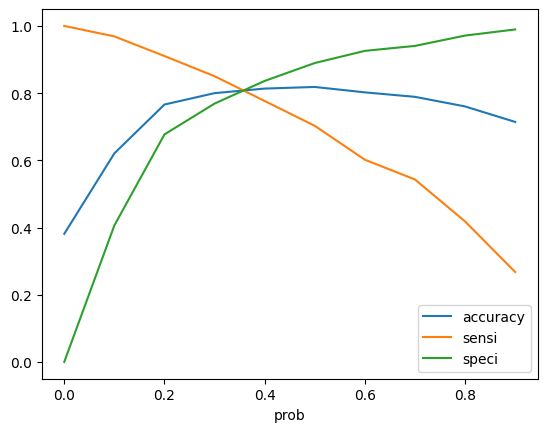

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [109]:
test = y_train_pred_final
test['final_predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
print(metrics.accuracy_score(test.Converted, test.final_predicted))
confusion_test = metrics.confusion_matrix(test.Converted, test.final_predicted )
confusion_test

0.7999381570810142


array([[3077,  925],
       [ 369, 2097]])

In [110]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
TP / float(TP+FN)

0.8503649635036497

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.494952          0    1    1    1    1    1    0    0   
1          0        0.110536          0    1    1    0    0    0    0    0   
2          0        0.311932          0    1    1    1    1    0    0    0   
3          0        0.863395          1    1    1    1    1    1    1    1   
4          0        0.150100          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                1  
3    1    1    0                1  
4    0    0    0                0

In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7999381570810142

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3077,  925],
       [ 369, 2097]])

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8503649635036497

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.7688655672163918

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2311344327836082


In [118]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6939113170086035


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8929193267556588


# Precision and Recall

In [121]:
#Looking at the confusion matrix again

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3560,  442],
       [ 733, 1733]])

##### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7967816091954023

Recall
TP / TP + FN

In [124]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.702757502027575

Using sklearn utilities for the same

In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
?precision_score

In [128]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7967816091954023

In [129]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.702757502027575

# Precision and recall tradeoff

In [130]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

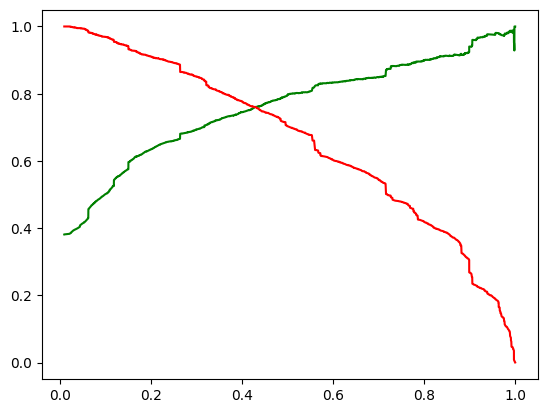

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [135]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [136]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     1.066716                                    0   
2376                    -0.939381                                    0   
7766                    -0.822309                                    0   
9199                    -0.939381                                    0   
4359                    -0.939381                                    0   

      Lead Origin_Lead Add Form  Lead Source_Reference  \
4269                          0                      0   
2376                          1                      1   
7766                          0                      0   
9199                          0                      0   
4359                          1                      1   

      Lead Source_Welingak Website  Last Activity_Olark Chat  \
4269                             0                         0   
2376                             0                         0   
7766                             0                         0   
9199                             0                         1   
4359                             0                         0   

      Last Activity_Welingak Website  Specialization_Hospitality Management  \
4269                               0                                      0   
2376                               0                                      0   
7766                               0                                      0   
9199                               0                                      0   
4359                               0                                      0   

      Specialization_UnKnown  What is your current occupation_Housewife  \
4269                       1                                          0   
2376                       1                                          0   
7766                       0                                          0   
9199                       1                                          0   
4359                       0                                          0   

      What is your current occupation_UnKnown  \
4269                                        1   
2376                                        0   
7766                                        0   
9199                                        0   
4359                                        0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_SMS Sent  
4269                               1  
2376                               1  
7766                               0  
9199                               0  
4359                               0

Making predictions on the test set

In [142]:
X_test = X_test.drop(['What is your current occupation_Housewife','Lead Source_Reference','Lead Source_Welingak Website'],  axis=1)

In [143]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

const  Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269    1.0                     1.066716                                    0   
2376    1.0                    -0.939381                                    0   
7766    1.0                    -0.822309                                    0   
9199    1.0                    -0.939381                                    0   
4359    1.0                    -0.939381                                    0   
...     ...                          ...                                  ...   
8649    1.0                    -0.363942                                    1   
2152    1.0                    -0.939381                                    0   
7101    1.0                    -0.939381                                    0   
5331    1.0                     1.798911                                    1   
2960    1.0                    -0.939381                                    0   

      Lead Origin_Lead Add Form  Last Activity_Olark Chat  \
4269                          0                         0   
2376                          1                         0   
7766                          0                         0   
9199                          0                         1   
4359                          1                         0   
...                         ...                       ...   
8649                          0                         0   
2152                          1                         0   
7101                          0                         1   
5331                          0                         0   
2960                          1                         0   

      Last Activity_Welingak Website  Specialization_Hospitality Management  \
4269                               0                                      0   
2376                               0                                      0   
7766                               0                                      0   
9199                               0                                      0   
4359                               0                                      0   
...                              ...                                    ...   
8649                               0                                      0   
2152                               0                                      0   
7101                               0                                      0   
5331                               0                                      0   
2960                               0                                      0   

      Specialization_UnKnown  What is your current occupation_UnKnown  \
4269                       1                                        1   
2376                       1                                        0   
7766                       0                                        0   
9199                       1                                        0   
4359                       0                                        0   
...                      ...                                      ...   
8649                       0                                        1   
2152                       1                                        0   
7101                       1                                        0   
5331                       0                                        1   
2960                       1                                        0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      
...                                                 ...      
8649                                    

In [144]:
y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

4269    0.598813
2376    0.903150
7766    0.804259
9199    0.147395
4359    0.878700
9186    0.607555
1631    0.517591
8963    0.177326
8007    0.042789
5324    0.361152
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head
y_pred_1.head()

0
4269  0.598813
2376  0.903150
7766  0.804259
9199  0.147395
4359  0.878700

In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

Converted         0
0          1  0.598813
1          1  0.903150
2          1  0.804259
3          0  0.147395
4          1  0.878700

In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [153]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis=1)

In [154]:
y_pred_final.head()

Converted  Converted_Prob
0          1        0.598813
1          1        0.903150
2          1        0.804259
3          0        0.147395
4          1        0.878700

In [155]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [156]:
y_pred_final.head()

Converted  Converted_Prob  final_predicted
0          1        0.598813                1
1          1        0.903150                1
2          1        0.804259                1
3          0        0.147395                0
4          1        0.878700                1

In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8196248196248196

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1437,  240],
       [ 260,  835]])

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7625570776255708

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.8568872987477638